In [175]:
from scipy.stats import geom
import numpy as np
import matplotlib.pyplot as plt
import math

In [176]:
f = open("data.txt", "r")
data = [int(x) for x in f.read().split()]
print(data)
data = np.sort(data)
amm = dict()
for i in data:
    if not i in amm.keys():
        amm.update({i : 1})
    else:
        amm[i] += 1
amm_m = amm.copy()
print('\n', amm_m)
for i in amm.keys():
    amm[i] /= 100
print('\n', amm)

[2, 0, 8, 0, 15, 1, 1, 1, 7, 1, 0, 0, 3, 1, 1, 1, 0, 0, 3, 1, 2, 4, 10, 6, 1, 0, 1, 0, 0, 2, 0, 1, 5, 0, 1, 9, 4, 2, 11, 3, 2, 0, 8, 1, 6, 3, 0, 1, 1, 4, 0, 9, 5, 3, 3, 0, 0, 10, 2, 0, 3, 11, 0, 9, 0, 1, 4, 1, 0, 2, 0, 1, 1, 3, 4, 7, 1, 3, 3, 0, 4, 7, 6, 0, 3, 0, 1, 15, 11, 1, 2, 4, 0, 2, 0, 0, 0, 26, 4, 0]

 {0: 29, 1: 22, 2: 9, 3: 11, 4: 8, 5: 2, 6: 3, 7: 3, 8: 2, 9: 3, 10: 2, 11: 3, 15: 2, 26: 1}

 {0: 0.29, 1: 0.22, 2: 0.09, 3: 0.11, 4: 0.08, 5: 0.02, 6: 0.03, 7: 0.03, 8: 0.02, 9: 0.03, 10: 0.02, 11: 0.03, 15: 0.02, 26: 0.01}


#### Полігон частостей реалізації виборки

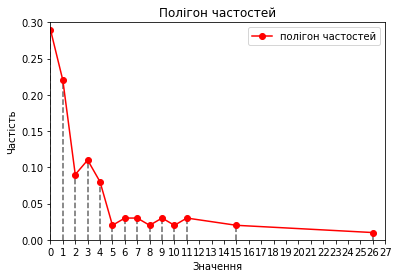

In [177]:
plt.plot(list(amm.keys()), list(amm.values()), '-o', color = 'r', label = 'полігон частостей')
plt.title('Полігон частостей')
plt.ylabel('Частість')
plt.xlabel('Значення')
plt.axis([0, 27, 0.00, 0.30])
plt.xticks([i for i in range(0, 28)])
for i in amm.keys():
    plt.vlines(x = i, ymin = 0.00, ymax = amm[i], linestyles = 'dashed', color = '0.4')
plt.legend()
plt.savefig('pictures/pol.png', dpi = 300)
plt.show()

In [178]:
def pascal_prob(k, a):
    return (a ** k)/((1 + a)**(k + 1))

Порівняння полігону частостей реалізації виборки та полігону ймовірностей:

#### 1) закону Паскаля з a = 1

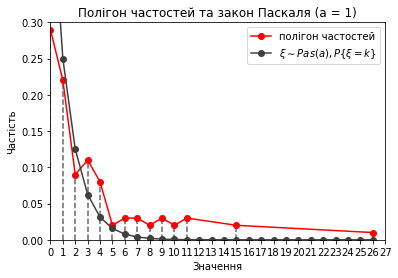

In [179]:
plt.plot(list(amm.keys()), list(amm.values()), '-o', color = 'r', label = 'полігон частостей')
plt.title('Полігон частостей та закон Паскаля (a = 1)')
plt.ylabel('Частість')
plt.xlabel('Значення')
plt.axis([0, 26, 0.00, 0.30])
plt.xticks([i for i in range(0, 28)])
for i in amm.keys():
    plt.vlines(x = i, ymin = 0.00, ymax = amm[i], linestyles = 'dashed', color = '0.4')
plt.plot([i for i in range(27)], [pascal_prob(i, 1) for i in range(27)], '-o', color = '0.25', label = r'$\xi \sim Pas(a), P\left\{\xi = k\right\}$')
plt.legend()
plt.savefig('pictures/pol+pas1.png', dpi = 300)
plt.show()

#### 2) закону Паскаля з a = 2

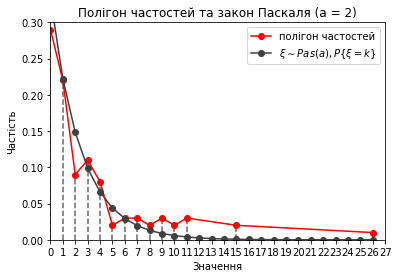

In [180]:
plt.plot(list(amm.keys()), list(amm.values()), '-o', color = 'r', label = 'полігон частостей')
plt.title('Полігон частостей та закон Паскаля (a = 2)')
plt.ylabel('Частість')
plt.xlabel('Значення')
plt.axis([0, 26, 0.00, 0.30])
plt.xticks([i for i in range(0, 28)])
for i in amm.keys():
    plt.vlines(x = i, ymin = 0.00, ymax = amm[i], linestyles = 'dashed', color = '0.4')
plt.plot([i for i in range(27)], [pascal_prob(i, 2) for i in range(27)], '-o', color = '0.25', label = r'$\xi \sim Pas(a), P\left\{\xi = k\right\}$')
plt.legend()
plt.savefig('pictures/pol+pas2.png', dpi = 300)
plt.show()

#### 3) закону Паскаля з a = 3

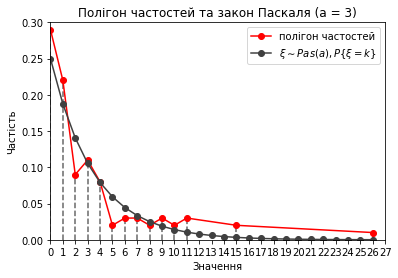

In [181]:
plt.plot(list(amm.keys()), list(amm.values()), '-o', color = 'r', label = 'полігон частостей')
plt.title('Полігон частостей та закон Паскаля (a = 3)')
plt.ylabel('Частість')
plt.xlabel('Значення')
plt.axis([0, 26, 0.00, 0.30])
plt.xticks([i for i in range(0, 28)])
for i in amm.keys():
    plt.vlines(x = i, ymin = 0.00, ymax = amm[i], linestyles = 'dashed', color = '0.4')
plt.plot([i for i in range(27)], [pascal_prob(i, 3) for i in range(27)], '-o', color = '0.25', label = r'$\xi \sim Pas(a), P\left\{\xi = k\right\}$')
plt.legend()
plt.savefig('pictures/pol+pas3.png', dpi = 300)
plt.show()

Знайдемо емпіричну функцію розподілу.

In [182]:
def empiric_distribution(x):
    if x <= 0:
        return 0
    elif 0 < x <= 1:
        return 0.29
    elif 1 < x <= 2:
        return 0.51
    elif 2 < x <= 3:
        return 0.60
    elif 3 < x <= 4:
        return 0.71
    elif 4 < x <= 5:
        return 0.79
    elif 5 < x <= 6:
        return 0.81
    elif 6 < x <= 7:
        return 0.84
    elif 7 < x <= 8:
        return 0.87
    elif 8 < x <= 9:
        return 0.89
    elif 9 < x <= 10:
        return 0.92
    elif 10 < x <= 11:
        return 0.94
    elif 11 < x <= 15:
        return 0.97
    elif 15 < x <= 26:
        return 0.99
    else:
        return 1

Емпірична функція розподілу

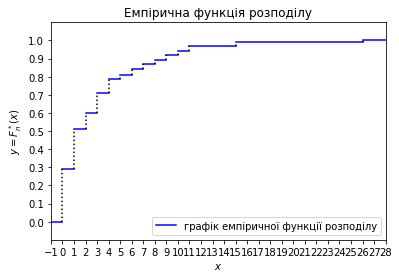

In [183]:
inters = [(-1, 0), (0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9), (9, 10), (10, 11), (11, 15), (15, 26), (26, 28)]
for x1, x2 in inters:
    if (x1, x2) != (26, 28):
        plt.plot([x1, x2], [empiric_distribution((x1 + x2)/2), empiric_distribution((x1 + x2)/2)], color = 'b')
    else:
        plt.plot([x1, x2], [empiric_distribution((x1 + x2)/2), empiric_distribution((x1 + x2)/2)], color = 'b', label = 'графік емпіричної функції розподілу')
dots = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 15, 26]
for i in dots:
    plt.plot([i, i], [empiric_distribution(i), empiric_distribution(i + 0.01)], color='black', linestyle='dotted')
plt.title('Емпірична функція розподілу')
plt.ylabel('$y = F_n^*(x)$')
plt.xlabel('$x$')
plt.xticks([i for i in range(-1, 29)])
plt.yticks([i for i in np.arange(0.0, 1.1, 0.1)])
plt.axis([-1, 28, -0.1, 1.1])
#final settings
plt.legend()
plt.savefig('pictures/func.png', dpi = 300)
plt.show()

Емпірична функція розподілу + закон Паскаля( a = 1 )

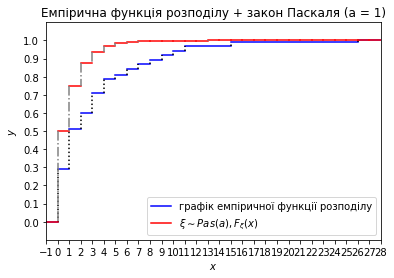

In [184]:
#empiric distr func
inters = [(-1, 0), (0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9), (9, 10), (10, 11), (11, 15), (15, 26), (26, 28)]
for x1, x2 in inters:
    if (x1, x2) != (26, 28):
        plt.plot([x1, x2], [empiric_distribution((x1 + x2)/2), empiric_distribution((x1 + x2)/2)], color = 'b')
    else:
        plt.plot([x1, x2], [empiric_distribution((x1 + x2)/2), empiric_distribution((x1 + x2)/2)], color = 'b', label = 'графік емпіричної функції розподілу')
dots = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 15, 26]
for i in dots:
    plt.plot([i, i], [empiric_distribution(i), empiric_distribution(i + 0.01)], color='black', linestyle='dotted')
#Pascal distribution
#geom.cdf(x + 1, 1 / (1 + a)) a = 1
#
#
#
a = 1
inters = [(i, i + 1) for i in range(-1, 28)]
for x1, x2 in inters:
    if (x1, x2) != (26, 27):
        plt.plot([x1, x2], [geom.cdf((x1 + x2)/2 + 1, 1 / (1 + a)), geom.cdf((x1 + x2)/2 + 1, 1 / (1 + a))], color = 'red')
    else:
        plt.plot([x1, x2], [geom.cdf((x1 + x2)/2 + 1, 1 / (1 + a)), geom.cdf((x1 + x2)/2 + 1, 1 / (1 + a))], color = 'red', label = r'$\xi \sim Pas(a), F_\xi(x)$')
dots = [i for i in range(0, 27)]
for i in dots:
    plt.plot([i, i], [geom.cdf(i + 1, 1 / (1 + a)), geom.cdf((i- 0.5) + 1, 1 / (1 + a))], color='gray', linestyle='-.')
#
#
#
plt.title('Емпірична функція розподілу + закон Паскаля (a = 1)')
plt.ylabel('$y$')
plt.xlabel('$x$')
plt.xticks([i for i in range(-1, 29)])
plt.yticks([i for i in np.arange(0.0, 1.1, 0.1)])
plt.axis([-1, 28, -0.1, 1.1])
#final settings
plt.legend()
plt.savefig('pictures/func+geom4.png', dpi = 300)
plt.show()

Емпірична функція розподілу + закон Паскаля( a = 2 )

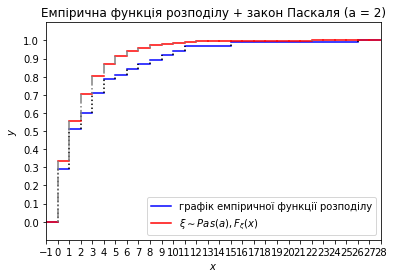

In [185]:
#empiric distr func
inters = [(-1, 0), (0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9), (9, 10), (10, 11), (11, 15), (15, 26), (26, 28)]
for x1, x2 in inters:
    if (x1, x2) != (26, 28):
        plt.plot([x1, x2], [empiric_distribution((x1 + x2)/2), empiric_distribution((x1 + x2)/2)], color = 'b')
    else:
        plt.plot([x1, x2], [empiric_distribution((x1 + x2)/2), empiric_distribution((x1 + x2)/2)], color = 'b', label = 'графік емпіричної функції розподілу')
dots = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 15, 26]
for i in dots:
    plt.plot([i, i], [empiric_distribution(i), empiric_distribution(i + 0.01)], color='black', linestyle='dotted')
#Pascal distribution
#geom.cdf(x + 1, 1 / (1 + a)) a = 1
#
#
#
a = 2
inters = [(i, i + 1) for i in range(-1, 28)]
for x1, x2 in inters:
    if (x1, x2) != (26, 27):
        plt.plot([x1, x2], [geom.cdf((x1 + x2)/2 + 1, 1 / (1 + a)), geom.cdf((x1 + x2)/2 + 1, 1 / (1 + a))], color = 'red')
    else:
        plt.plot([x1, x2], [geom.cdf((x1 + x2)/2 + 1, 1 / (1 + a)), geom.cdf((x1 + x2)/2 + 1, 1 / (1 + a))], color = 'red', label = r'$\xi \sim Pas(a), F_\xi(x)$')
dots = [i for i in range(0, 27)]
for i in dots:
    plt.plot([i, i], [geom.cdf(i + 1, 1 / (1 + a)), geom.cdf((i- 0.5) + 1, 1 / (1 + a))], color='gray', linestyle='-.')
#
#
#
plt.title('Емпірична функція розподілу + закон Паскаля (a = 2)')
plt.ylabel('$y$')
plt.xlabel('$x$')
plt.xticks([i for i in range(-1, 29)])
plt.yticks([i for i in np.arange(0.0, 1.1, 0.1)])
plt.axis([-1, 28, -0.1, 1.1])
#final settings
plt.legend()
plt.savefig('pictures/func+geom3.png', dpi = 300)
plt.show()

Емпірична функція розподілу + закон Паскаля( a = 3 )

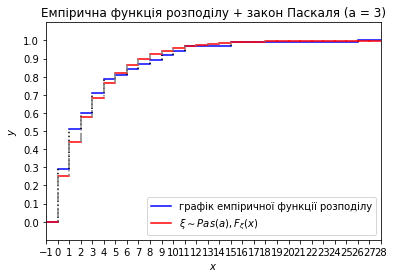

In [186]:
#empiric distr func
inters = [(-1, 0), (0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9), (9, 10), (10, 11), (11, 15), (15, 26), (26, 28)]
for x1, x2 in inters:
    if (x1, x2) != (26, 28):
        plt.plot([x1, x2], [empiric_distribution((x1 + x2)/2), empiric_distribution((x1 + x2)/2)], color = 'b')
    else:
        plt.plot([x1, x2], [empiric_distribution((x1 + x2)/2), empiric_distribution((x1 + x2)/2)], color = 'b', label = 'графік емпіричної функції розподілу')
dots = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 15, 26]
for i in dots:
    plt.plot([i, i], [empiric_distribution(i), empiric_distribution(i + 0.01)], color='black', linestyle='dotted')
#Pascal distribution
#geom.cdf(x + 1, 1 / (1 + a)) a = 1
#
#
#
a = 3
inters = [(i, i + 1) for i in range(-1, 28)]
for x1, x2 in inters:
    if (x1, x2) != (26, 27):
        plt.plot([x1, x2], [geom.cdf((x1 + x2)/2 + 1, 1 / (1 + a)), geom.cdf((x1 + x2)/2 + 1, 1 / (1 + a))], color = 'red')
    else:
        plt.plot([x1, x2], [geom.cdf((x1 + x2)/2 + 1, 1 / (1 + a)), geom.cdf((x1 + x2)/2 + 1, 1 / (1 + a))], color = 'red', label = r'$\xi \sim Pas(a), F_\xi(x)$')
dots = [i for i in range(0, 27)]
for i in dots:
    plt.plot([i, i], [geom.cdf(i + 1, 1 / (1 + a)), geom.cdf((i- 0.5) + 1, 1 / (1 + a))], color='gray', linestyle='-.')
#
#
#
plt.title('Емпірична функція розподілу + закон Паскаля (a = 3)')
plt.ylabel('$y$')
plt.xlabel('$x$')
plt.xticks([i for i in range(-1, 29)])
plt.yticks([i for i in np.arange(0.0, 1.1, 0.1)])
plt.axis([-1, 28, -0.1, 1.1])
#final settings
plt.legend()
plt.savefig('pictures/func+geom2.png', dpi = 300)
plt.show()

Знайдемо вибіркове середнє та вибіркову дисперсію, вибіркову ассиметрію:

In [187]:
Exi = 0
for i in amm_m.keys():
    Exi += i * amm_m[i]
Exi /= 100
print('Exi = ', Exi)

Exi =  3.06


In [191]:
Dxi = 0
for i in data:
    Dxi += (i - Exi)**2
Dxi /= 100
print('Dxi = ', Dxi)

Dxi =  17.136400000000002


In [192]:
Asxi = 0
for i in data:
    Asxi += (i - Exi)**3
Asxi /= 100 * (Dxi)**(3/2)
print('Asxi = ', Asxi)

Asxi =  2.504088773053977


In [194]:
Dxi = 0
for i in data:
    Dxi += (i - Exi)**2
Dxi /= 99
print('Dxi(unmoved) = ', Dxi)

Dxi(unmoved) =  17.30949494949495
